### Лабораторна робота №2: Групи та підгрупи

**Мета роботи:** Попрацювати з деякими групами та підгрупами в Sage, познайомитися з графами Келі груп

---
### 1. Приклади груп

Для кожної з груп $G$= $S_3$, $D_4$, $\mathbb{Z}_{14}$, $\mathbb{Z}_{14}^{*}$ виконайте наступні кроки:
1. Створіть групу.
2. Знайдіть порядок групи.     # G.order()
3. Побудуйте таблицю Келі групи.    # G.cayley_table(names='elements')
4. Виберіть довільні два елементи в групі.
5. Виконайте групову операцію над обраними елементами.
6. Знайдіть обернені для обраних елементів.
7. Визначте, чи є група абелевою. Якщо ні, то знайдіть два елементи групи, які не комутують.   # G.is_abelian()

In [97]:
G = SymmetricGroup(3)
elements = list(G)
print("Порядок:", G.order())
print("Абелева:", G.is_abelian())
print("Обернені:", [x^-1 for x in elements])
[[a * b for b in elements] for a in elements]

Порядок: 6
Абелева: False
Обернені: [(), (1,2,3), (1,3,2), (2,3), (1,3), (1,2)]


[[(), (1,3,2), (1,2,3), (2,3), (1,3), (1,2)],
 [(1,3,2), (1,2,3), (), (1,2), (2,3), (1,3)],
 [(1,2,3), (), (1,3,2), (1,3), (1,2), (2,3)],
 [(2,3), (1,3), (1,2), (), (1,3,2), (1,2,3)],
 [(1,3), (1,2), (2,3), (1,2,3), (), (1,3,2)],
 [(1,2), (2,3), (1,3), (1,3,2), (1,2,3), ()]]

In [98]:
G = DihedralGroup(4)
elements = list(G)
print("Порядок:", G.order())
print("Абелева:", G.is_abelian())
print("Обернені:", [x^-1 for x in elements])
[[a * b for b in elements] for a in elements]

Порядок: 8
Абелева: False
Обернені: [(), (1,3)(2,4), (1,2,3,4), (1,4,3,2), (2,4), (1,3), (1,4)(2,3), (1,2)(3,4)]


[[(), (1,3)(2,4), (1,4,3,2), (1,2,3,4), (2,4), (1,3), (1,4)(2,3), (1,2)(3,4)],
 [(1,3)(2,4), (), (1,2,3,4), (1,4,3,2), (1,3), (2,4), (1,2)(3,4), (1,4)(2,3)],
 [(1,4,3,2), (1,2,3,4), (1,3)(2,4), (), (1,2)(3,4), (1,4)(2,3), (2,4), (1,3)],
 [(1,2,3,4), (1,4,3,2), (), (1,3)(2,4), (1,4)(2,3), (1,2)(3,4), (1,3), (2,4)],
 [(2,4), (1,3), (1,4)(2,3), (1,2)(3,4), (), (1,3)(2,4), (1,4,3,2), (1,2,3,4)],
 [(1,3), (2,4), (1,2)(3,4), (1,4)(2,3), (1,3)(2,4), (), (1,2,3,4), (1,4,3,2)],
 [(1,4)(2,3), (1,2)(3,4), (1,3), (2,4), (1,2,3,4), (1,4,3,2), (), (1,3)(2,4)],
 [(1,2)(3,4), (1,4)(2,3), (2,4), (1,3), (1,4,3,2), (1,2,3,4), (1,3)(2,4), ()]]

In [99]:
Z4 = IntegerModRing(4)
elements = list(Z4)
print("Порядок:", Z4.order())
print("Абелева:", Z4.is_commutative())
print("Обернені:", [x^-1 if x in Z4.unit_group() else None for x in elements])
[[a + b for b in elements] for a in elements]

Порядок: 4
Абелева: True
Обернені: [None, 1, None, None]


[[0, 1, 2, 3], [1, 2, 3, 0], [2, 3, 0, 1], [3, 0, 1, 2]]

In [100]:
Z4 = IntegerModRing(4)
G = [Z4(1), Z4(3)]
print("Порядок:", len(G))
print("Абелева:", all(a * b == b * a for a in G for b in G))
print("Обернені:", [x^-1 for x in G])
[[a * b for b in G] for a in G]

Порядок: 2
Абелева: True
Обернені: [1, 3]


[[1, 3], [3, 1]]

---
### 2. Ізоморфні групи

1. Створіть групи $D_3$, $S_3$, $\mathbb{Z}_7^{*}$, $SL_2(\mathbb{Z}_2)$, $D_{12}$, $A_4$, $SL_2(\mathbb{Z}_3)$.
2. Перевірте, які з них ізоморфні.   % G.is_isomorphic(H)

In [101]:
G1 = DihedralGroup(3)
G2 = SymmetricGroup(3)
G3 = AbelianGroup([2, 3])
G4 = SL(2, GF(2))
G5 = DihedralGroup(12)
G6 = AlternatingGroup(4)
G7 = SL(2, GF(3))

In [102]:
groups = [G1, G2, G3, G4, G5, G6, G7]
names = ["D₃", "S₃", "ℤ*₆", "SL₂(ℤ₂)", "D₁₂", "A₄", "SL₂(ℤ₃)"]
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        try:
            iso = groups[i].is_isomorphic(groups[j])
        except:
            iso = False
        print(f"{names[i]} ≅ {names[j]} → {iso}")

D₃ ≅ S₃ → True
D₃ ≅ ℤ*₆ → False
D₃ ≅ SL₂(ℤ₂) → False
D₃ ≅ D₁₂ → False
D₃ ≅ A₄ → False
D₃ ≅ SL₂(ℤ₃) → False
S₃ ≅ ℤ*₆ → False
S₃ ≅ SL₂(ℤ₂) → False
S₃ ≅ D₁₂ → False
S₃ ≅ A₄ → False
S₃ ≅ SL₂(ℤ₃) → False
ℤ*₆ ≅ SL₂(ℤ₂) → False
ℤ*₆ ≅ D₁₂ → False
ℤ*₆ ≅ A₄ → False
ℤ*₆ ≅ SL₂(ℤ₃) → False
SL₂(ℤ₂) ≅ D₁₂ → False
SL₂(ℤ₂) ≅ A₄ → False
SL₂(ℤ₂) ≅ SL₂(ℤ₃) → False
D₁₂ ≅ A₄ → False
D₁₂ ≅ SL₂(ℤ₃) → False
A₄ ≅ SL₂(ℤ₃) → False


---

### 3. Підгрупи і гратка підгруп

Для кожної з груп $\mathbb{Z}_{24}$, $Q_8$, $D_5$, $S_4$ виконайте наступні кроки:

1. Створіть групу.
2. Знайдіть усі її підгрупи.   % G.subgroups()
3. Побудуйте гратку підгруп.   % G.subgroup_lattice() може не працювати, запитайте Gemini or ChatGpt
4. Вкажіть групу, яка сама не абелева, але всі її власні підгрупи є абелевими.



In [103]:
G = AbelianGroup([24])
subs = G.subgroups()
for i, H in enumerate(subs):
    print(f"Підгрупа {i+1}: порядок = {H.order()}, генератори = {H.gens()}")

Підгрупа 1: порядок = 24, генератори = (f,)
Підгрупа 2: порядок = 12, генератори = (f^2,)
Підгрупа 3: порядок = 8, генератори = (f^3,)
Підгрупа 4: порядок = 6, генератори = (f^4,)
Підгрупа 5: порядок = 4, генератори = (f^6,)
Підгрупа 6: порядок = 3, генератори = (f^8,)
Підгрупа 7: порядок = 2, генератори = (f^12,)
Підгрупа 8: порядок = 1, генератори = ()


In [104]:
G = QuaternionGroup()
subs = G.subgroups()
for i, H in enumerate(subs):
    print(f"Підгрупа {i+1}: порядок = {H.order()}, генератори = {H.gens()}")

Підгрупа 1: порядок = 1, генератори = ((),)
Підгрупа 2: порядок = 2, генератори = ((1,3)(2,4)(5,7)(6,8),)
Підгрупа 3: порядок = 4, генератори = ((1,3)(2,4)(5,7)(6,8), (1,5,3,7)(2,8,4,6))
Підгрупа 4: порядок = 4, генератори = ((1,3)(2,4)(5,7)(6,8), (1,2,3,4)(5,6,7,8))
Підгрупа 5: порядок = 4, генератори = ((1,3)(2,4)(5,7)(6,8), (1,6,3,8)(2,5,4,7))
Підгрупа 6: порядок = 8, генератори = ((1,3)(2,4)(5,7)(6,8), (1,5,3,7)(2,8,4,6), (1,2,3,4)(5,6,7,8))


In [105]:
G = DihedralGroup(5)
subs = G.subgroups()
for i, H in enumerate(subs):
    print(f"Підгрупа {i+1}: порядок = {H.order()}, генератори = {H.gens()}")

Підгрупа 1: порядок = 1, генератори = ((),)
Підгрупа 2: порядок = 2, генератори = ((2,5)(3,4),)
Підгрупа 3: порядок = 2, генератори = ((1,2)(3,5),)
Підгрупа 4: порядок = 2, генератори = ((1,3)(4,5),)
Підгрупа 5: порядок = 2, генератори = ((1,4)(2,3),)
Підгрупа 6: порядок = 2, генератори = ((1,5)(2,4),)
Підгрупа 7: порядок = 5, генератори = ((1,2,3,4,5),)
Підгрупа 8: порядок = 10, генератори = ((1,2,3,4,5), (2,5)(3,4))


In [106]:
G = SymmetricGroup(3)
subs = G.subgroups()
for i, H in enumerate(subs):
    print(f"Підгрупа {i+1}: порядок = {H.order()}, генератори = {H.gens()}")

Підгрупа 1: порядок = 1, генератори = ((),)
Підгрупа 2: порядок = 2, генератори = ((2,3),)
Підгрупа 3: порядок = 2, генератори = ((1,2),)
Підгрупа 4: порядок = 2, генератори = ((1,3),)
Підгрупа 5: порядок = 3, генератори = ((1,2,3),)
Підгрупа 6: порядок = 6, генератори = ((1,2,3), (2,3))


---
### 4. Системи твірних

Для кожної з груп $\mathbb{Z}_{24}$, $Q_8$, $D_5$, $S_4$ виконайте наступні кроки:

1. Створіть групу.
2. Знайдіть деяку систему твірних групи.    % G.gens()
3. Знайдіть всі мінімальні системи твірних групи.    % G.minimal_generating_sets()
4. Візьміть довільні два елементи групи, породіть ними підгрупу, знайдіть її порядок.  % G.subgroup([el1, el2])

In [108]:
G = AbelianGroup([24])
print("Генератори групи:", G.gens())
print("Мінімальна система твірних:", [G.gen(0)])
e1 = G.gen(0)
H = G.subgroup([e1])
print("Підгрупа, породжена e1: порядок =", H.order())

Генератори групи: (f,)
Мінімальна система твірних: [f]
Підгрупа, породжена e1: порядок = 24


In [109]:
from itertools import combinations
G = QuaternionGroup()
gens = G.gens()
print("Генератори:", gens)
for r in range(1, len(gens)+1):
    for subset in combinations(gens, r):
        H = G.subgroup(list(subset))
        if H.order() == G.order():
            print(f"Мінімальна система твірних: {subset}")
            break
    else:
        continue
    break

Генератори: ((1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6))
Мінімальна система твірних: ((1,2,3,4)(5,6,7,8), (1,5,3,7)(2,8,4,6))


In [110]:
from itertools import combinations
G = DihedralGroup(5)
gens = G.gens()
print("Генератори:", gens)
for r in range(1, len(gens)+1):
    for subset in combinations(gens, r):
        H = G.subgroup(list(subset))
        if H.order() == G.order():
            print(f"Мінімальна система твірних: {subset}")
            break
    else:
        continue
    break

Генератори: ((1,2,3,4,5), (1,5)(2,4))
Мінімальна система твірних: ((1,2,3,4,5), (1,5)(2,4))


In [111]:
from itertools import combinations
G = SymmetricGroup(4)
gens = G.gens()
print("Генератори:", gens)
for r in range(1, len(gens)+1):
    for subset in combinations(gens, r):
        H = G.subgroup(list(subset))
        if H.order() == G.order():
            print(f"Мінімальна система твірних: {subset}")
            break
    else:
        continue
    break

Генератори: ((1,2,3,4), (1,2))
Мінімальна система твірних: ((1,2,3,4), (1,2))


---
### 5. Графи Келі

Графом Келі групи $G$ відносно системи твірних $S$ називається орієнтований граф $\Gamma(G,S)$, вершинами якого є елементи групи і кожний $g\in G$ з'єднаний орієнтованим ребро з $gs$ для всіх $s\in S$.

1. Побудуйте графи Келі для груп $D_4$, $Q_8$, $S_3$, $S_4$, $A_4$ для деяких систем твірних.  % G.cayley_graph()
2. Опишіть спостереження: які особливості бачите у графів Келі груп?

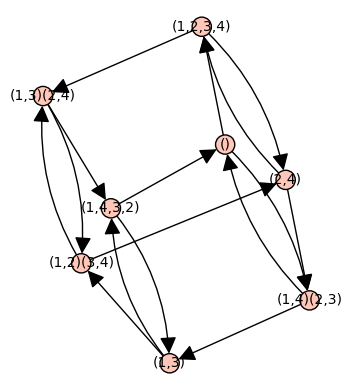

In [112]:
G = DihedralGroup(4)
S = G.gens()
Γ = G.cayley_graph(generators=S, side="left")
Γ.show()

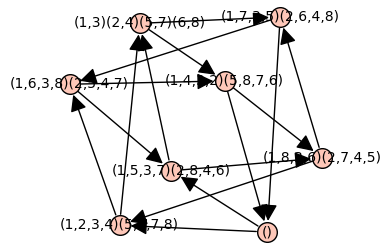

In [113]:
G = QuaternionGroup()
S = G.gens()
Γ = G.cayley_graph(generators=S, side="left")
Γ.show()

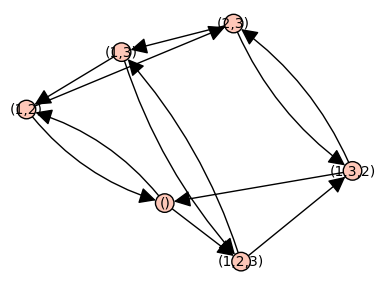

In [114]:
G = SymmetricGroup(3)
S = G.gens()
Γ = G.cayley_graph(generators=S, side="left")
Γ.show()

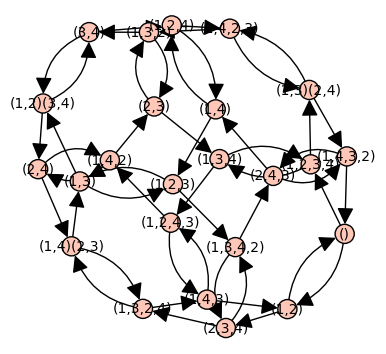

In [115]:
G = SymmetricGroup(4)
S = G.gens()
Γ = G.cayley_graph(generators=S, side="left")
Γ.show()

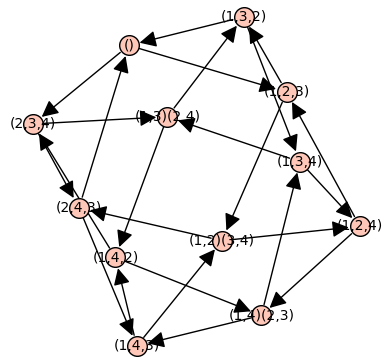

In [116]:
G = AlternatingGroup(4)
S = G.gens()
Γ = G.cayley_graph(generators=S, side="left")
Γ.show()

---

### 6*. Група підстановок, породжена випадковими підстановками

1. Створіть групи $S_n$ та $A_n$ для великого числа $n$.
2. Проведіть наступний експеримент багато разів (в циклі):<br>
       2.1. Згенеруйте дві випадкові підстановки в $S_n$.<br>
       2.2. Перевірте, парні вони чи ні.<br>
       2.3. Перевірте, чи породжують вони всю групу $S_n$ або її підгрупу $A_n$. 
4. Сформулюйте гіпотезу про те, яка ймовірність породження симетричної групи двома підстановками та що відбувається при $n\rightarrow\infty$.



In [117]:
n = 5
Sn = SymmetricGroup(n)
An = AlternatingGroup(n)
count_Sn = 0
count_An = 0
count_other = 0
even_pairs = 0
trials = 100
for _ in range(trials):
    p1 = Sn.random_element()
    p2 = Sn.random_element()
    is_even1 = p1.sign() == 1
    is_even2 = p2.sign() == 1
    if is_even1 and is_even2:
        even_pairs += 1
    G = Sn.subgroup([p1, p2])
    order = G.order()
    if order == Sn.order():
        count_Sn += 1
    elif order == An.order():
        count_An += 1
    else:
        count_other += 1
print(f"n = {n}, кількість експериментів = {trials}")
print(f"Парні обидві: {even_pairs}")
print(f"Породили Sₙ: {count_Sn}")
print(f"Породили Aₙ: {count_An}")
print(f"Інша підгрупа: {count_other}")

n = 5, кількість експериментів = 100
Парні обидві: 24
Породили Sₙ: 46
Породили Aₙ: 18
Інша підгрупа: 36


---
### 7*. Чи є граф Петерсена графом Келі?

1. Побудуйте граф Петерсена.
2. Перевірте, чи є граф Петерсена графом Келі деякої групи.

In [21]:
# Ваш код тут: